# **Regresión Logística**

La regresión logística permite predecir a qué clase pertenece cada uno de los datos de entrada. 

Paso 1: Cargar librerías 

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

load_digits tiene un database de imágenes de dígitos con su clase 

$x\rightarrow $ imagen de numero

$y\rightarrow $ numero

In [ ]:
mnist = fetch_openml("mnist_784")

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

**Data Set Characteristics:**
Number of Instances: 5620

Number of Attributes: 784

Attribute Information: 28x28 image of integer pixels from 0 - 255

'DESCR': Descripcion de dataset

'data': Array de bits de imagenes por fila $\rightarrow x$

'target': Array de nombres de targets por instancia $\rightarrow y$

'target_names': Clases

In [ ]:
mnist['data'].shape # (filas,columnas) o (instancias,atributos)

(70000, 784)

In [ ]:
mnist['target'].shape #(filas,columnas)

(70000,)

In [ ]:
#mnist['data'][0,:]

## Plotear datos de entrada

### Para varios datos

Recordando

**Enumerate** : Sirve para anadir enumeración a la lista

**Zip**       : Sirve para concatenar listas en una tupla

Quiero mostrar 5 imagenes seguidas desde un inicio random

In [ ]:
nInstancias = mnist['data'].shape[0]
idx = np.random.randint(nInstancias-5)

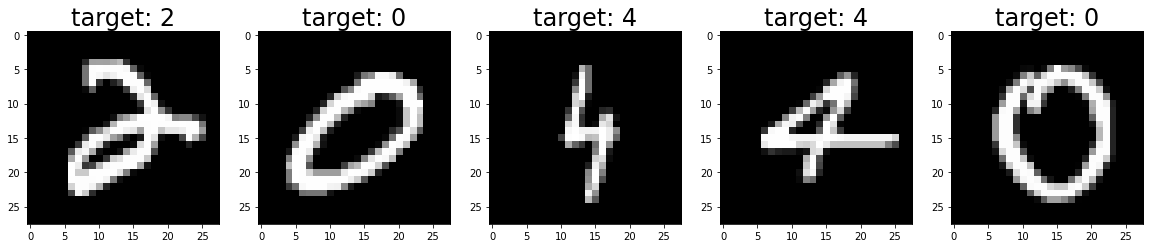

In [ ]:
plt.figure(figsize=(20,4))

#  Aqui mostramos 5 imagenes desde indx hasta idx+5 y para ello concatenamos en tupla la imagen (en forma de fila)(x) y la clase que pertenece(y)
#  Con enumerate enumero la lista y me ayuda para plotear con subplot

for index, (image, label) in enumerate(zip(mnist['data'][idx:idx+5,:], mnist['target'][idx:idx+5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.title(f"target: {label}", size=24)
  #plt.show()

## *Regresion Logistica*

### **Training/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

### **Clasificacion Multinomial Entrenamiento**

_ -> [0,1,2,3,4,5,6,7,8,9]

0 -> [1,0,0,0,0,0,0,0,0,0]

1 -> [0,1,0,0,0,0,0,0,0,0]

2 -> [0,0,1,0,0,0,0,0,0,0]

9 -> [0,0,0,0,0,0,0,0,0,1]

Esto para que las predicciones que se hagan hw(x)=[0.1,0.1,0.7,0,0,0,0,0,0.1] con las probabilidades identifique mejor a que clase pertenece.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(tol=0.001, solver='lbfgs', max_iter=1000)
model2 = LogisticRegression(tol=0.001, solver='saga', max_iter=1000)

In [ ]:
model3 = LogisticRegression(tol=0.01, solver='lbfgs', max_iter=10000)
model4 = LogisticRegression(tol=0.01, solver='saga', max_iter=10000)

In [ ]:
model5 = LogisticRegression()
model6 = LogisticRegression(solver='saga')
model7 = LogisticRegression(solver='sag')

In [ ]:
model8 = LogisticRegression(tol=0.001, solver='saga', max_iter=10000)


Aqui se entrena

In [ ]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
model3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
model4.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
model5.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model6.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model7.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Como se puede ver en el esquema el algoritmo tiene 10 clases y para cada clase se calcula la funcion lineal o pesos para la prediccion de esta con los atributos de x (o se calcula la frontera de decision para cada clase). Para ello se calcula **los mejores w** y **para cada clase hay 784 ws** sin contar el bias. 

Con model.coef_ se ven estos coeficientes que estan distribuidos en 10 filas con 784 valores cada una (784 columnas)

Cone model.intercept_ se ve el bias o **w0** por cada clase



In [ ]:
model1.coef_.shape

(10, 784)

In [ ]:
model1.intercept_.shape

(10,)

### **Clasificacion Multinomial Test**

**Accuracy Score**

**Modelo 1**


In [ ]:
score1 = model1.score(X_test, y_test)
score1

0.9110714285714285

**Modelo 2**


In [ ]:
score2 = model2.score(X_test, y_test)
score2

0.9137857142857143

**Modelo 3**

In [ ]:
score3 = model3.score(X_test, y_test)
score3

0.9092857142857143

**Modelo 4**

In [ ]:
score4 = model4.score(X_test, y_test)
score4

0.9172142857142858

**Modelo 5**

In [ ]:
score5 = model5.score(X_test, y_test)
score5

0.9172142857142858

**Modelo 6**

In [ ]:
score6 = model6.score(X_test, y_test)
score6

0.9157142857142857

**Modelo 7**

In [ ]:
score7 = model7.score(X_test, y_test)
score7

0.9155

Los mejores modelos son el modelo 4 y el 5.

Modelo 4 $\rightarrow$ solver='saga', tol=0.01, max_iter=10000

Modelo 5 $\rightarrow$ solver='lbfgs', tol=0.0001, max_iter=100

**Prediccion**

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [88]:
y_pred = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

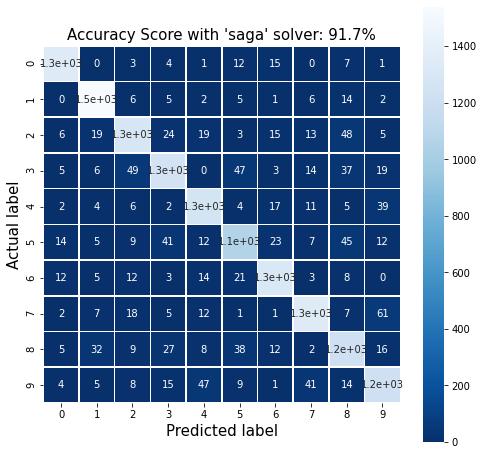

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f"Accuracy Score with 'saga' solver: {np.round(100*score4,1)}%", size = 15)
plt.show()

In [90]:
y_pred = model5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

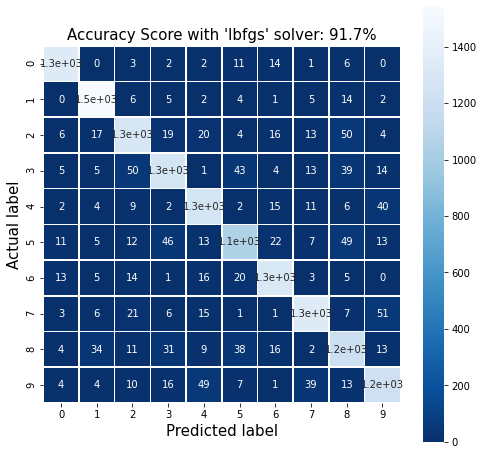

In [91]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f"Accuracy Score with 'lbfgs' solver: {np.round(100*score5,1)}%", size = 15)
plt.show()